In [1]:
import numpy as np
from skopt import load
from skopt.plots import plot_evaluations, plot_objective, plot_convergence
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Plot options
plt.set_cmap("viridis")
sns.set()
sns.set_style("whitegrid")

/Users/au478108/opt/miniconda3/envs/dage/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/au478108/opt/miniconda3/envs/dage/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<Figure size 432x288 with 0 Axes>

In [2]:
# Print available checkpoints
cp_dir = Path('../runs/optimizer')
for p in cp_dir.glob('*'):
     print(p.name)

dage_lda_ft_wd
dage_mfa_ft_wd
ccsa_ft_ad
ccsa_ft_da
ccsa_ft_aw
dsne_ft_wd
ccsa_mnist_usps_2
dage_mfa_ft_ad
dage_lda_ft_ad
dage_mnist_usps_2
dsne_mnist_usps_1
dage_mfa_ft_aw
dage_mnist_usps_3
dage_mfa_ft_da
dage_mnist_usps_4
dage_lda_ft_aw
dage_lda_ft_da
ccsa_ft_wd
dsne_ft_da
dsne_ft_aw
dsne_ft_ad
dage_mfa_ft_wa
dage_lda_ft_wa
dsne_ft_wa
ccsa_ft_dw
dage_mnist_usps_1
dsne_mnist_usps_3
dage_mnist_usps_0
dage_lda_ft_dw
dage_mfa_ft_dw
dsne_mnist_usps_2
dsne_ft_dw
tune_source_mnist_usps_0
ccsa_ft_wa


In [5]:
# Load checkpoint
experiment_id = 'dage_mnist_usps_4'
cp_path = cp_dir / experiment_id / 'checkpoint.pkl'
res = load(str(cp_path.resolve()))

In [6]:
print('iterations: {}'.format(len(res.x_iters)))
print('max acc: {}'.format(-res.fun))
print('best hyper parameters:')
params = dict(zip([s.name for s in res.space], res.x))
params

iterations: 100
max acc: 0.8786144578313253
best hyper parameters:


{'lr': 0.0038887253900310287,
 'inv_mom': 0.49999999999999994,
 'lr_decay': 0.00014648210925683809,
 'dropout': 0.57783357465899,
 'l2': 0.0001467630176008636,
 'alpha': 0.15690967946827786,
 'ce_ratio': 0.7660138351833835,
 'bn': 0,
 'standardize': 0,
 'resize_mode': 1}

In [9]:
# show tested parameters and their results
df = pd.DataFrame(
    [[-x[0], *x[1]] for x in list(zip(res.func_vals, res.x_iters))],
    columns=['acc', *[s.name for s in res.space]]
).reset_index().sort_values('acc', ascending=False)
df['mom'] = 1-df['inv_mom']
df.head(20)

,index,acc,lr,inv_mom,lr_decay,dropout,l2,alpha,ce_ratio,loss_param_1,num_unfrozen,data_ratio,batch_repeats,mom
31,31,0.989933,1.000000e-03,0.010000,1.000000e-02,0.100000,1.000000e-03,0.100000,0.000000,10.000000,16,1,3,0.990000
9,9,0.989907,7.918177e-08,0.297648,1.665447e-07,0.665386,6.844385e-07,0.151635,0.637970,0.000432,3,3,1,0.702352
32,32,0.989380,1.000000e-08,0.010000,1.000000e-02,0.800000,1.000000e-03,0.100000,0.000000,10.000000,16,1,3,0.990000
26,26,0.988474,1.094757e-08,0.010545,4.713945e-07,0.130979,1.372461e-05,0.152404,0.377728,0.016623,7,1,1,0.989455
4,4,0.988309,9.821388e-07,0.149137,3.285502e-03,0.144892,6.588331e-07,0.361479,0.400348,0.419940,12,2,1,0.850863
0,0,0.987369,4.096138e-05,0.060969,3.166576e-03,0.347912,1.344603e-04,0.815414,0.410846,1.377722,9,1,2,0.939031
6,6,0.986164,2.647579e-05,0.184755,4.398913e-03,0.114247,4.069808e-05,0.532137,0.524184,9.395632,3,2,2,0.815245
21,21,0.985749,4.929388e-06,0.295159,1.464301e-07,0.646214,9.812153e-04,0.104833,0.939216,0.000297,15,3,3,0.704841
25,25,0.985224,1.992001e-06,0.010000,1.000000e-02,0.100000,1.000000e-07,0.100000,0.459888,0.000010,16,1,3,0.990000
7,7,0.984297,4.427122e-05,0.038414,1.051289e-04,0.758175,3.850685e-04,0.749098,0.627768,0.000047,5,2,3,0.961586


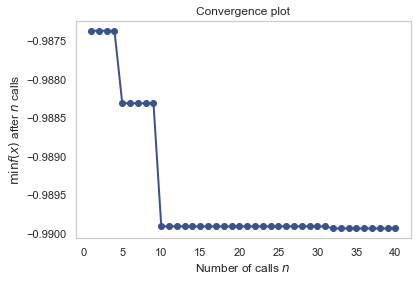

In [10]:
conv_fig = plot_convergence(res)

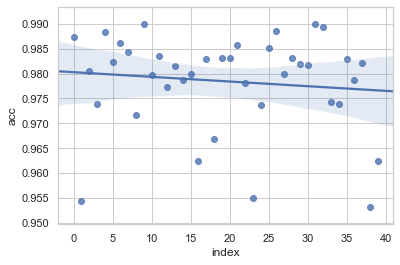

In [11]:
reg_fig = sns.regplot(x='index', y='acc', data=df)

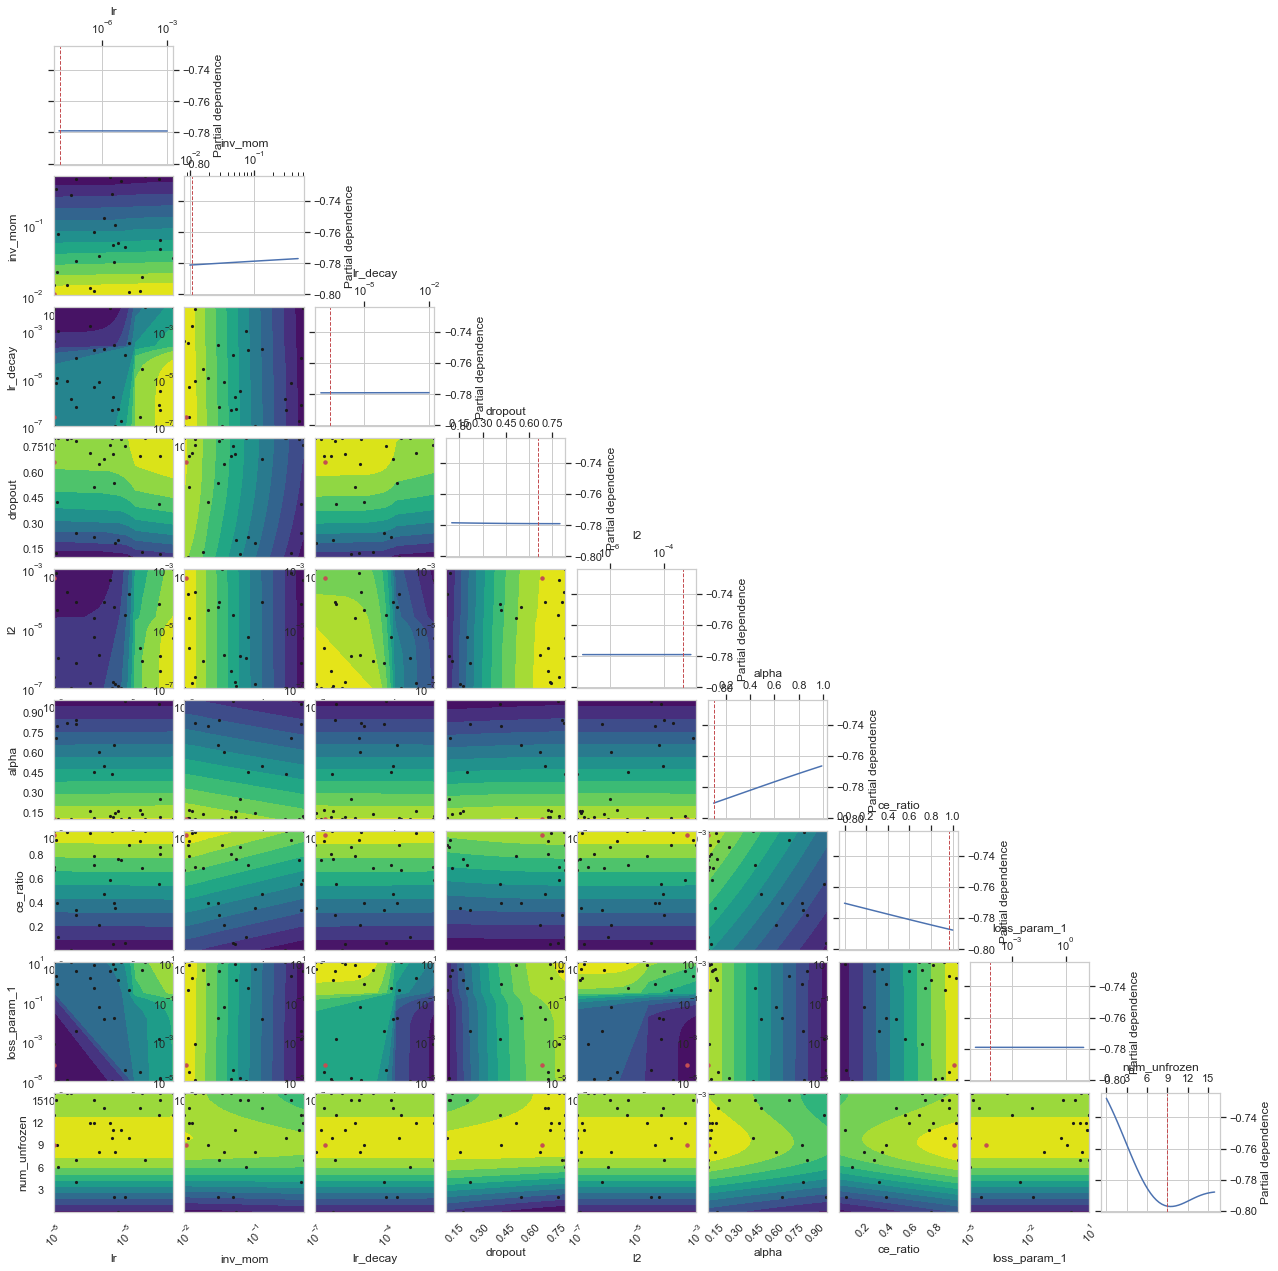

In [275]:
""" Partial dependence plot
Visualise the one dimensional partial dependence of the surrogate model for each dimension. 
The contour plots show the two dimensional partial dependence. 
"""
obj_fig = plot_objective(res)

In [276]:
obj_fig.flatten()[0].figure.savefig("figures/obj_{}.png".format(experiment_id))

In [ ]:
""" Evaluations
The diagonal shows histograms for each of the dimensions. 
The off the diagonal are two dimensional scatter plot of all points are shown. 
The order in which points were evaluated is encoded in the color of each point. 
Darker/purple colors correspond to earlier samples and lighter/yellow colors correspond to later samples. 
A red point shows the location of the minimum found by the optimization process.
"""
eval_fig = plot_evaluations(res, bins=10)